This notebook fits the deterministic model to the mouse macrophage data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as so
import scipy.stats as sc
import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D

SMALL_SIZE = 15
MEDIUM_SIZE = 21
BIGGER_SIZE = 21

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'Arial'

###---------------------- Extracting data for experiment 1 --------------------------###
excel_file_LPS= pd.ExcelFile('./data_preprocessing/macrophage_data/Summary_LPS.xlsx')
excel_file= pd.ExcelFile('./data_preprocessing/macrophage_data/Summary_NO_LPS.xlsx')

mtvol_1hr = pd.read_excel(excel_file, "1 hr", usecols = 'F', skiprows = lambda x: (x < 4) or (x >= 93))
mtvol_1hr = np.array(mtvol_1hr["total volume"])[~ np.isnan(np.array(mtvol_1hr["total volume"]))]
mtvol_3hr = pd.read_excel(excel_file, "3 hr", usecols = 'F', skiprows = lambda x: (x < 5) or (x >= 93))
mtvol_3hr = np.array(mtvol_3hr["total volume"])[~ np.isnan(np.array(mtvol_3hr["total volume"]))]
mtvol_7hr = pd.read_excel(excel_file, "7 hr", usecols = 'F', skiprows = lambda x: (x < 5) or (x >= 89))
mtvol_7hr = np.array(mtvol_7hr["total volume"])[~ np.isnan(np.array(mtvol_7hr["total volume"]))]
mtvol_26hr = pd.read_excel(excel_file, "26 hr", usecols = 'F', skiprows = lambda x: (x < 4) or (x >= 73))
mtvol_26hr = np.array(mtvol_26hr["total volume"])[~ np.isnan(np.array(mtvol_26hr["total volume"]))]

cellvol_1hr = pd.read_excel(excel_file, "1 hr", usecols = 'C', skiprows = lambda x: (x < 4) or (x >= 93))
cellvol_1hr = np.array(cellvol_1hr["Cell volume"])[~ np.isnan(np.array(cellvol_1hr["Cell volume"]))]
cellvol_3hr = pd.read_excel(excel_file, "3 hr", usecols = 'C', skiprows = lambda x: (x < 5) or (x >= 93))
cellvol_3hr = np.array(cellvol_3hr["Cell volume"])[~ np.isnan(np.array(cellvol_3hr["Cell volume"]))]
cellvol_7hr = pd.read_excel(excel_file, "7 hr", usecols = 'C', skiprows = lambda x: (x < 5) or (x >= 89))
cellvol_7hr = np.array(cellvol_7hr["Cell volume"])[~ np.isnan(np.array(cellvol_7hr["Cell volume"]))]
cellvol_26hr = pd.read_excel(excel_file, "26 hr", usecols = 'C', skiprows = lambda x: (x < 4) or (x >= 73))
cellvol_26hr = np.array(cellvol_26hr["Cell volume"])[~ np.isnan(np.array(cellvol_26hr["Cell volume"]))]

#Extracting into panda dataframes
dna_1hr = pd.read_excel(excel_file, "1 hr", usecols = 'U', skiprows = lambda x: (x < 4) or (x >= 93))
dna_1hr = np.array(dna_1hr["count.2"])[~ np.isnan(np.array(dna_1hr["count.2"]))]
dna_3hr = pd.read_excel(excel_file, "3 hr", usecols = 'U', skiprows = lambda x: (x < 5) or (x >= 93))
dna_3hr = np.array(dna_3hr["count.2"])[~ np.isnan(np.array(dna_3hr["count.2"]))]
dna_7hr = pd.read_excel(excel_file, "7 hr", usecols = 'U', skiprows = lambda x: (x < 5) or (x >= 89))
dna_7hr = np.array(dna_7hr["count.2"])[~ np.isnan(np.array(dna_7hr["count.2"]))]
dna_26hr = pd.read_excel(excel_file, "26 hr", usecols = 'U', skiprows = lambda x: (x < 4) or (x >= 73))
dna_26hr = np.array(dna_26hr["count.2"])[~ np.isnan(np.array(dna_26hr["count.2"]))]

edu_1hr = pd.read_excel(excel_file, "1 hr", usecols = 'M', skiprows = lambda x: (x < 4) or (x >= 93))
edu_1hr = np.array(edu_1hr["count.1"])[~ np.isnan(np.array(edu_1hr["count.1"]))]
edu_3hr = pd.read_excel(excel_file, "3 hr", usecols = 'M', skiprows = lambda x: (x < 5) or (x >= 93))
edu_3hr = np.array(edu_3hr["count.1"])[~ np.isnan(np.array(edu_3hr["count.1"]))]
edu_7hr = pd.read_excel(excel_file, "7 hr", usecols = 'M', skiprows = lambda x: (x < 5) or (x >= 89))
edu_7hr = np.array(edu_7hr["count.1"])[~ np.isnan(np.array(edu_7hr["count.1"]))]
edu_26hr = pd.read_excel(excel_file, "26 hr", usecols = 'M', skiprows = lambda x: (x < 4) or (x >= 73))
edu_26hr = np.array(edu_26hr["count.1"])[~ np.isnan(np.array(edu_26hr["count.1"]))]

mean_edu = np.array([np.mean(edu_1hr), np.mean(edu_3hr), np.mean(edu_7hr), np.mean(edu_26hr)])
err_edu = np.array([np.std(edu_1hr)/np.sqrt(len(edu_1hr)), np.std(edu_3hr)/np.sqrt(len(edu_3hr)), np.std(edu_7hr)/np.sqrt(len(edu_7hr)), np.std(edu_26hr)/np.sqrt(len(edu_26hr))])

mean_dna = np.array([np.mean(dna_1hr), np.mean(dna_3hr), np.mean(dna_7hr), np.mean(dna_26hr)])
err_dna = np.array([np.std(dna_1hr)/np.sqrt(len(dna_1hr)), np.std(dna_3hr)/np.sqrt(len(dna_3hr)), np.std(dna_7hr)/np.sqrt(len(dna_7hr)), np.std(dna_26hr)/np.sqrt(len(dna_26hr))])

mean_mtvol = np.array([np.mean(mtvol_1hr), np.mean(mtvol_3hr), np.mean(mtvol_7hr), np.mean(mtvol_26hr)])
err_mtvol = np.array([np.std(mtvol_1hr)/np.sqrt(len(mtvol_1hr)), np.std(mtvol_3hr)/np.sqrt(len(mtvol_3hr)), np.std(mtvol_7hr)/np.sqrt(len(mtvol_7hr)), np.std(mtvol_26hr)/np.sqrt(len(mtvol_26hr))])

mean_cellvol = np.array([np.mean(cellvol_1hr), np.mean(cellvol_3hr), np.mean(cellvol_7hr), np.mean(cellvol_26hr)])
err_cellvol = np.array([np.std(cellvol_1hr)/np.sqrt(len(cellvol_1hr)), np.std(cellvol_3hr)/np.sqrt(len(cellvol_3hr)), np.std(cellvol_7hr)/np.sqrt(len(cellvol_7hr)), np.std(cellvol_26hr)/np.sqrt(len(cellvol_26hr))])

mean_edu_prop = np.array([np.mean(edu_1hr/dna_1hr), np.mean(edu_3hr/dna_3hr), np.mean(edu_7hr/dna_7hr), np.mean(edu_26hr/dna_26hr)])
err_edu_prop = np.array([np.std(edu_1hr/dna_1hr)/np.sqrt(len(edu_1hr/dna_1hr)), np.std(edu_3hr/dna_3hr)/np.sqrt(len(edu_3hr/dna_3hr)), np.std(edu_7hr/dna_7hr)/np.sqrt(len(edu_7hr/dna_7hr)), np.std(edu_26hr/dna_26hr)/np.sqrt(len(edu_26hr/dna_26hr))])

#Extracting into panda dataframes
mtvol_1hr_LPS = pd.read_excel(excel_file_LPS, "1 hr", usecols = 'F', skiprows = lambda x: (x < 4) or (x >= 76))
mtvol_1hr_LPS = np.array(mtvol_1hr_LPS["total volume"])[~ np.isnan(np.array(mtvol_1hr_LPS["total volume"]))]
mtvol_3hr_LPS = pd.read_excel(excel_file_LPS, "3 hr", usecols = 'F', skiprows = lambda x: (x < 5) or (x >= 80))
mtvol_3hr_LPS = np.array(mtvol_3hr_LPS["total volume"])[~ np.isnan(np.array(mtvol_3hr_LPS["total volume"]))]
mtvol_7hr_LPS = pd.read_excel(excel_file_LPS, "7 hr", usecols = 'F', skiprows = lambda x: (x < 5) or (x >= 69))
mtvol_7hr_LPS = np.array(mtvol_7hr_LPS["total volume"])[~ np.isnan(np.array(mtvol_7hr_LPS["total volume"]))]
mtvol_26hr_LPS = pd.read_excel(excel_file_LPS, "26 hr", usecols = 'F', skiprows = lambda x: (x < 4) or (x >= 61))
mtvol_26hr_LPS = np.array(mtvol_26hr_LPS["total volume"])[~ np.isnan(np.array(mtvol_26hr_LPS["total volume"]))]

cellvol_1hr_LPS = pd.read_excel(excel_file_LPS, "1 hr", usecols = 'C', skiprows = lambda x: (x < 4) or (x >= 76))
cellvol_1hr_LPS = np.array(cellvol_1hr_LPS["Cell volume"])[~ np.isnan(np.array(cellvol_1hr_LPS["Cell volume"]))]
cellvol_3hr_LPS = pd.read_excel(excel_file_LPS, "3 hr", usecols = 'C', skiprows = lambda x: (x < 5) or (x >= 80))
cellvol_3hr_LPS = np.array(cellvol_3hr_LPS["Cell volume"])[~ np.isnan(np.array(cellvol_3hr_LPS["Cell volume"]))]
cellvol_7hr_LPS = pd.read_excel(excel_file_LPS, "7 hr", usecols = 'C', skiprows = lambda x: (x < 5) or (x >= 69))
cellvol_7hr_LPS = np.array(cellvol_7hr_LPS["Cell volume"])[~ np.isnan(np.array(cellvol_7hr_LPS["Cell volume"]))]
cellvol_26hr_LPS = pd.read_excel(excel_file_LPS, "26 hr", usecols = 'C', skiprows = lambda x: (x < 4) or (x >= 61))
cellvol_26hr_LPS = np.array(cellvol_26hr_LPS["Cell volume"])[~ np.isnan(np.array(cellvol_26hr_LPS["Cell volume"]))]

dna_1hr_LPS = pd.read_excel(excel_file_LPS, "1 hr", usecols = 'U', skiprows = lambda x: (x < 4) or (x >= 76))
dna_1hr_LPS = np.array(dna_1hr_LPS["count.2"])[~ np.isnan(np.array(dna_1hr_LPS["count.2"]))]
dna_3hr_LPS = pd.read_excel(excel_file_LPS, "3 hr", usecols = 'U', skiprows = lambda x: (x < 5) or (x >= 80))
dna_3hr_LPS = np.array(dna_3hr_LPS["count.2"])[~ np.isnan(np.array(dna_3hr_LPS["count.2"]))]
dna_7hr_LPS = pd.read_excel(excel_file_LPS, "7 hr", usecols = 'U', skiprows = lambda x: (x < 5) or (x >= 69))
dna_7hr_LPS = np.array(dna_7hr_LPS["count.2"])[~ np.isnan(np.array(dna_7hr_LPS["count.2"]))]
dna_26hr_LPS = pd.read_excel(excel_file_LPS, "26 hr", usecols = 'U', skiprows = lambda x: (x < 4) or (x >= 61))
dna_26hr_LPS = np.array(dna_26hr_LPS["count.2"])[~ np.isnan(np.array(dna_26hr_LPS["count.2"]))]

edu_1hr_LPS = pd.read_excel(excel_file_LPS, "1 hr", usecols = 'M', skiprows = lambda x: (x < 4) or (x >= 76))
edu_1hr_LPS = np.array(edu_1hr_LPS["count.1"])[~ np.isnan(np.array(edu_1hr_LPS["count.1"]))]
edu_3hr_LPS = pd.read_excel(excel_file_LPS, "3 hr", usecols = 'M', skiprows = lambda x: (x < 5) or (x >= 80))
edu_3hr_LPS = np.array(edu_3hr_LPS["count.1"])[~ np.isnan(np.array(edu_3hr_LPS["count.1"]))]
edu_7hr_LPS = pd.read_excel(excel_file_LPS, "7 hr", usecols = 'M', skiprows = lambda x: (x < 5) or (x >= 69))
edu_7hr_LPS = np.array(edu_7hr_LPS["count.1"])[~ np.isnan(np.array(edu_7hr_LPS["count.1"]))]
edu_26hr_LPS = pd.read_excel(excel_file_LPS, "26 hr", usecols = 'M', skiprows = lambda x: (x < 4) or (x >= 61))
edu_26hr_LPS = np.array(edu_26hr_LPS["count.1"])[~ np.isnan(np.array(edu_26hr_LPS["count.1"]))]

mean_edu_LPS = np.array([np.mean(edu_1hr_LPS), np.mean(edu_3hr_LPS), np.mean(edu_7hr_LPS), np.mean(edu_26hr_LPS)])
err_edu_LPS = np.array([np.std(edu_1hr_LPS)/np.sqrt(len(edu_1hr_LPS)), np.std(edu_3hr_LPS)/np.sqrt(len(edu_3hr_LPS)), np.std(edu_7hr_LPS)/np.sqrt(len(edu_7hr_LPS)), np.std(edu_26hr_LPS)/np.sqrt(len(edu_26hr_LPS))])

mean_dna_LPS = np.array([np.mean(dna_1hr_LPS), np.mean(dna_3hr_LPS), np.mean(dna_7hr_LPS), np.mean(dna_26hr_LPS)])
err_dna_LPS = np.array([np.std(dna_1hr_LPS)/np.sqrt(len(dna_1hr_LPS)), np.std(dna_3hr_LPS)/np.sqrt(len(dna_3hr_LPS)), np.std(dna_7hr_LPS)/np.sqrt(len(dna_7hr_LPS)), np.std(dna_26hr_LPS)/np.sqrt(len(dna_26hr_LPS))])

mean_mtvol_LPS = np.array([np.mean(mtvol_1hr_LPS), np.mean(mtvol_3hr_LPS), np.mean(mtvol_7hr_LPS), np.mean(mtvol_26hr_LPS)])
err_mtvol_LPS = np.array([np.std(mtvol_1hr_LPS)/np.sqrt(len(mtvol_1hr_LPS)), np.std(mtvol_3hr_LPS)/np.sqrt(len(mtvol_3hr_LPS)), np.std(mtvol_7hr_LPS)/np.sqrt(len(mtvol_7hr_LPS)), np.std(mtvol_26hr_LPS)/np.sqrt(len(mtvol_26hr_LPS))])

mean_cellvol_LPS = np.array([np.mean(cellvol_1hr_LPS), np.mean(cellvol_3hr_LPS), np.mean(cellvol_7hr_LPS), np.mean(cellvol_26hr_LPS)])
err_cellvol_LPS = np.array([np.std(cellvol_1hr_LPS)/np.sqrt(len(cellvol_1hr_LPS)), np.std(cellvol_3hr_LPS)/np.sqrt(len(cellvol_3hr_LPS)), np.std(cellvol_7hr_LPS)/np.sqrt(len(cellvol_7hr_LPS)), np.std(cellvol_26hr_LPS)/np.sqrt(len(cellvol_26hr_LPS))])

mean_edu_prop_LPS = np.array([np.mean(edu_1hr_LPS/dna_1hr_LPS), np.mean(edu_3hr_LPS/dna_3hr_LPS), np.mean(edu_7hr/dna_7hr), np.mean(edu_26hr_LPS/dna_26hr_LPS)])
err_edu_prop_LPS = np.array([np.std(edu_1hr_LPS/dna_1hr_LPS)/np.sqrt(len(edu_1hr_LPS/dna_1hr_LPS)), np.std(edu_3hr_LPS/dna_3hr_LPS)/np.sqrt(len(edu_3hr_LPS/dna_3hr_LPS)), np.std(edu_7hr_LPS/dna_7hr_LPS)/np.sqrt(len(edu_7hr_LPS/dna_7hr_LPS)), np.std(edu_26hr_LPS/dna_26hr_LPS)/np.sqrt(len(edu_26hr_LPS/dna_26hr_LPS))])

Computing p values for non LPS stimulated cells vs LPS stimulated cells

In [2]:
print(sc.ttest_ind(mtvol_1hr_LPS, mtvol_1hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(mtvol_3hr_LPS, mtvol_3hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(mtvol_7hr_LPS, mtvol_7hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(mtvol_26hr_LPS, mtvol_26hr, equal_var = False, alternative='greater'))

print(sc.ttest_ind(mtvol_26hr_LPS, mtvol_1hr_LPS, equal_var = False, alternative='greater'))
print(sc.ttest_ind(mtvol_26hr, mtvol_1hr, equal_var = False, alternative='greater'))

TtestResult(statistic=3.314384356800403, pvalue=0.0006085669645478221, df=119.14013654195671)
TtestResult(statistic=2.527278350990542, pvalue=0.006393176686805692, df=120.8157011130533)
TtestResult(statistic=2.6597041399046955, pvalue=0.004480921958713883, df=112.57722526445926)
TtestResult(statistic=6.204139929928681, pvalue=9.264373891833108e-09, df=86.17978231753845)
TtestResult(statistic=5.023110045633896, pvalue=1.2687260654750502e-06, df=90.56556638739774)
TtestResult(statistic=1.9492013926483425, pvalue=0.026874681320570637, df=113.01372891478023)


In [3]:
print(sc.ttest_ind(dna_1hr_LPS, dna_1hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(dna_3hr_LPS, dna_3hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(dna_7hr_LPS, dna_7hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(dna_26hr_LPS, dna_26hr, equal_var = False, alternative='greater'))

print(sc.ttest_ind(dna_26hr_LPS, dna_1hr_LPS, equal_var = False, alternative='greater'))
print(sc.ttest_ind(dna_26hr, dna_1hr, equal_var = False, alternative='greater'))

TtestResult(statistic=1.3514814728407105, pvalue=0.08941640481721659, df=133.15547409866275)
TtestResult(statistic=0.9459407942750189, pvalue=0.17308255985868187, df=114.8259355384947)
TtestResult(statistic=3.4327452259557596, pvalue=0.000435229624615061, df=100.01298472220904)
TtestResult(statistic=3.880573550374657, pvalue=9.490788104775377e-05, df=97.19153271319384)
TtestResult(statistic=7.035489487000411, pvalue=2.224458162277331e-10, df=86.2940138263332)
TtestResult(statistic=4.0739386872412515, pvalue=4.48023081908134e-05, df=105.68144389624851)


In [4]:
print(sc.ttest_ind(cellvol_1hr_LPS, cellvol_1hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(cellvol_3hr_LPS, cellvol_3hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(cellvol_7hr_LPS, cellvol_7hr, equal_var = False, alternative='greater'))
print(sc.ttest_ind(cellvol_26hr_LPS, cellvol_26hr, equal_var = False, alternative='greater'))

print(sc.ttest_ind(cellvol_26hr_LPS, cellvol_1hr_LPS, equal_var = False, alternative='greater'))
print(sc.ttest_ind(cellvol_26hr, cellvol_1hr, equal_var = False, alternative='greater'))

TtestResult(statistic=5.907672198762246, pvalue=3.649247706486896e-08, df=83.36441776568789)
TtestResult(statistic=4.205777378354799, pvalue=2.7282978943456663e-05, df=105.97799245423512)
TtestResult(statistic=6.111154858649863, pvalue=1.9108009405706472e-08, df=76.72875727324296)
TtestResult(statistic=8.276106997130501, pvalue=3.5339335708320874e-12, df=67.77319591709883)
TtestResult(statistic=1.7133704599348563, pvalue=0.04480901318767396, df=104.20292190467715)
TtestResult(statistic=-0.41096048225103854, pvalue=0.659081628750783, df=119.6272183905196)


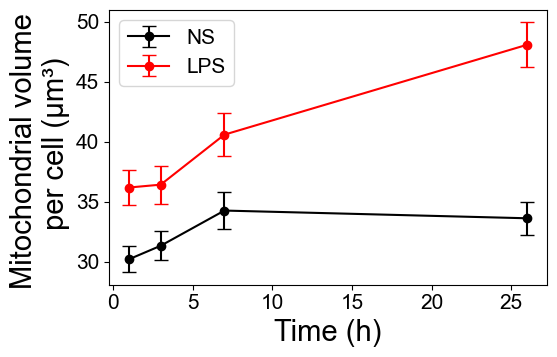

In [5]:
plt.figure(figsize = (6,4))
times = np.array([1,3,7,26])
#plt.plot(cts_times, 100*theoretical_edu_incorporation_fit(cts_times, popt[0], popt[1]), color = 'black', label ="Simulated")
plt.errorbar(times, mean_mtvol, err_mtvol, fmt = "o-", capsize=5, color = "black", label = 'NS')
plt.errorbar(times, mean_mtvol_LPS, err_mtvol_LPS, fmt = "o-", capsize=5, color = "red", label = 'LPS')
plt.legend()
plt.xlabel("Time (h)")
plt.ylabel("Mitochondrial volume \n per cell (μm³)")
plt.tight_layout()


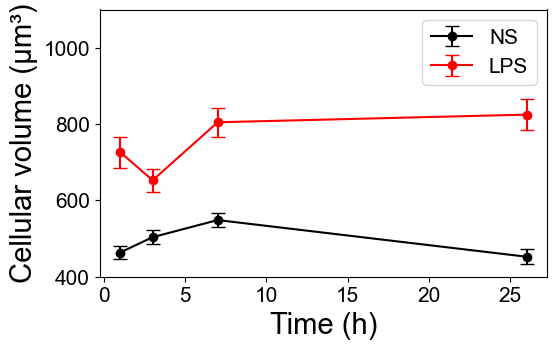

In [6]:
plt.figure(figsize = (6,4))
times = np.array([1,3,7,26])
#plt.plot(cts_times, 100*theoretical_edu_incorporation_fit(cts_times, popt[0], popt[1]), color = 'black', label ="Simulated")
plt.errorbar(times, mean_cellvol, err_cellvol, fmt = "o-", capsize=5, color = "black", label = 'NS')
plt.errorbar(times, mean_cellvol_LPS, err_cellvol_LPS, fmt = "o-", capsize=5, color = "red", label = 'LPS')
plt.ylim(400,1100)
plt.legend()
plt.xlabel("Time (h)")
plt.ylabel("Cellular volume (μm³)")
plt.tight_layout()

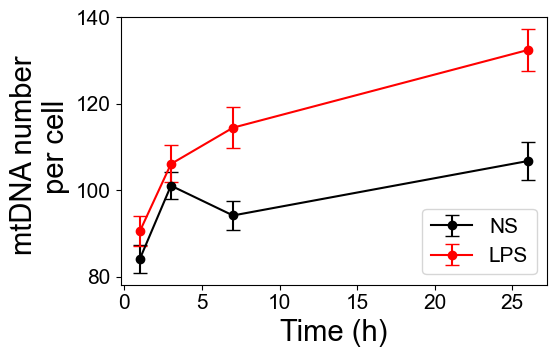

In [7]:
plt.figure(figsize = (6,4))
times = np.array([1,3,7,26])
#plt.plot(cts_times, 100*theoretical_edu_incorporation_fit(cts_times, popt[0], popt[1]), color = 'black', label ="Simulated")
plt.errorbar(times, mean_dna, err_dna, fmt = "o-", capsize=5, color = "black", label = 'NS')
plt.errorbar(times, mean_dna_LPS, err_dna_LPS, fmt = "o-", capsize=5, color = "red", label = 'LPS')
#plt.ylim(20,55)
plt.legend(loc = "lower right")
plt.xlabel("Time (h)")
plt.ylabel("mtDNA number \n per cell")
plt.tight_layout()

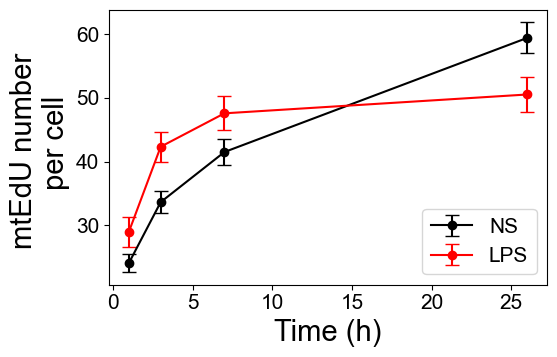

In [8]:
plt.figure(figsize = (6,4))
times = np.array([1,3,7,26])
#plt.plot(cts_times, 100*theoretical_edu_incorporation_fit(cts_times, popt[0], popt[1]), color = 'black', label ="Simulated")
plt.errorbar(times, mean_edu, err_edu, fmt = "o-", capsize=5, color = "black", label = 'NS')
plt.errorbar(times, mean_edu_LPS, err_edu_LPS, fmt = "o-", capsize=5, color = "red", label = 'LPS')
#plt.ylim(20,55)
plt.legend(loc = "lower right")
plt.xlabel("Time (h)")
plt.ylabel("mtEdU number \n per cell")
plt.tight_layout()

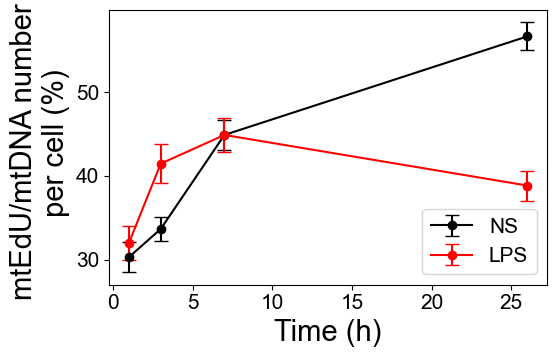

In [9]:
plt.figure(figsize = (6,4))
times = np.array([1,3,7,26])
#plt.plot(cts_times, 100*theoretical_edu_incorporation_fit(cts_times, popt[0], popt[1]), color = 'black', label ="Simulated")
plt.errorbar(times, 100*mean_edu_prop, 100*err_edu_prop, fmt = "o-", capsize=5, color = "black", label = 'NS')
plt.errorbar(times, 100*mean_edu_prop_LPS, 100*err_edu_prop_LPS, fmt = "o-", capsize=5, color = "red", label = 'LPS')
#plt.ylim(20,55)
plt.legend(loc = "lower right")
plt.xlabel("Time (h)")
plt.ylabel("mtEdU/mtDNA number \n per cell (%)")
plt.tight_layout()

Fitting the model to the non-LPS stimulated data

In [21]:
#training data for the non LPS stimulated cells
training_y = np.concatenate([edu_1hr/dna_1hr,edu_3hr/dna_3hr,edu_7hr/dna_7hr, edu_26hr/dna_26hr])
training_x = np.concatenate([np.ones(len(dna_1hr)),3*np.ones(len(dna_3hr)),7*np.ones(len(dna_7hr)),26*np.ones(len(dna_26hr))])

times = np.array([1,3,7,26])

#theoretical edu incorporation curve under the two populationmodel, where mu_p = (1+p)mu_d
def theoretical_edu_incorporation_fit(t, mu_p,  f):
    #f = mu/(mu+1/t_r)
    return 1 - (1-f)*np.exp(-mu_p*t)

popt, pcov = so.curve_fit(theoretical_edu_incorporation_fit, training_x, training_y, p0 = np.array([0.02,0.3]))

Computing and plotting turnover rate and error (Supplementary Information Section 5.1.1)

0.009115416063183395
0.0020567393152680124


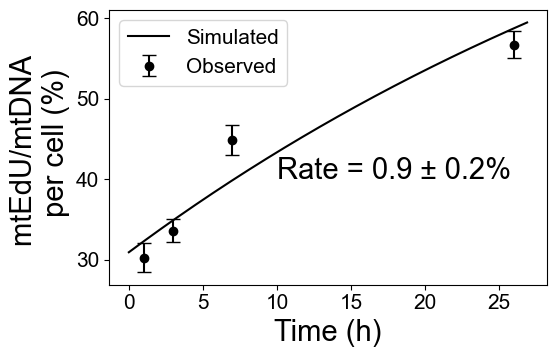

In [22]:
mu_p, f_r = popt
p=0.5
df_r = -mu_p/(1+p)
dmu_p = (1-f_r)/(1+p)
dp = -mu_p*(1-f_r)/(1+p)**2

no_LPS_replication_rate = mu_p*(1-f_r)/(1+p)
no_LPS_replication_rate_err = np.sqrt(df_r**2*pcov[1,1] + dmu_p**2*pcov[0,0]+dp**2/12 + 2*dmu_p*df_r*pcov[0,1])
print(no_LPS_replication_rate)
print(no_LPS_replication_rate_err)

plt.figure(figsize = (6,4))
cts_times = np.arange(27,step=0.1)
plt.plot(cts_times, 100*theoretical_edu_incorporation_fit(cts_times, popt[0], popt[1]), color = 'black', label ="Simulated")
plt.errorbar(times, 100*mean_edu_prop, 100*err_edu_prop, fmt = "o", capsize=5, color = "black", label = 'Observed')
plt.legend()
plt.xlabel("Time (h)")
plt.ylabel("mtEdU/mtDNA \n per cell (%)")
plt.text(x=10,y=40,s="Rate = 0.9 ± 0.2%")
plt.tight_layout()

Now fitting to the LPS stimulated cells, assuming that $\mu_b = \mu_d = 0$

In [23]:
#training data for the LPS stimulated cells
training_LPS_y = np.concatenate([dna_1hr_LPS, edu_1hr_LPS,dna_3hr_LPS, edu_3hr_LPS,dna_7hr_LPS, edu_7hr_LPS,dna_26hr_LPS, edu_26hr_LPS])
training_LPS_x = np.concatenate([np.ones(2*len(dna_1hr_LPS)),3*np.ones(2*len(dna_3hr_LPS)),7*np.ones(2*len(dna_7hr_LPS)),26*np.ones(2*len(dna_26hr_LPS))])

#We opt to solve the differential equation numerically here
def theoretical_edu_incorporation_LPS_fit(time, frac, mu_r,p,n_init):

    time = np.unique(time)
    def f(t,y):
        m = y[0]
        e_r = y[1]
        e_n = y[2]

        output1 = 0
        output2 = -p*mu_r*e_r
        output3 = (1+p)*mu_r*e_r

        return np.array([output1, output2, output3])
    
    numerical_ode = solve_ivp(f, t_span = np.array([0,26]), y0 = np.array([(1-frac)*n_init, frac*n_init, 0]), t_eval = time)

    output_1hr = np.concatenate([np.repeat(numerical_ode.y[0][0] + numerical_ode.y[1][0] + numerical_ode.y[2][0], len(dna_1hr_LPS)), np.repeat(numerical_ode.y[1][0] + numerical_ode.y[2][0], len(edu_1hr_LPS))])
    output_3hr = np.concatenate([np.repeat(numerical_ode.y[0][1] + numerical_ode.y[1][1] + numerical_ode.y[2][1], len(dna_3hr_LPS)), np.repeat(numerical_ode.y[1][1] + numerical_ode.y[2][1], len(edu_3hr_LPS))])
    output_7hr = np.concatenate([np.repeat(numerical_ode.y[0][2] + numerical_ode.y[1][2] + numerical_ode.y[2][2], len(dna_7hr_LPS)), np.repeat(numerical_ode.y[1][2] + numerical_ode.y[2][2], len(edu_7hr_LPS))])
    output_26hr = np.concatenate([np.repeat(numerical_ode.y[0][3] + numerical_ode.y[1][3] + numerical_ode.y[2][3], len(dna_26hr_LPS)), np.repeat(numerical_ode.y[1][3] + numerical_ode.y[2][3], len(edu_26hr_LPS))])

    return np.concatenate([output_1hr, output_3hr, output_7hr, output_26hr])

popt_LPS, pcov_LPS = so.curve_fit(theoretical_edu_incorporation_LPS_fit, training_LPS_x, training_LPS_y, p0 = np.array([0.3, 0.45, 0.4, 80]), maxfev=5000)

def theoretical_edu_incorporation_LPS(time, frac, mu_r,p,n_init):

    time = np.unique(time)
    def f(t,y):
        m = y[0]
        e_r = y[1]
        e_n = y[2]

        output1 = 0
        output2 = -p*mu_r*e_r
        output3 = (1+p)*mu_r*e_r

        return np.array([output1, output2, output3])
    
    numerical_ode = solve_ivp(f, t_span = np.array([0,26]), y0 = np.array([(1-frac)*n_init, frac*n_init, 0]), t_eval = time)

    return np.concatenate([numerical_ode.y[0] + numerical_ode.y[1] + numerical_ode.y[2], numerical_ode.y[1] + numerical_ode.y[2]])

(0.0, 140.0)

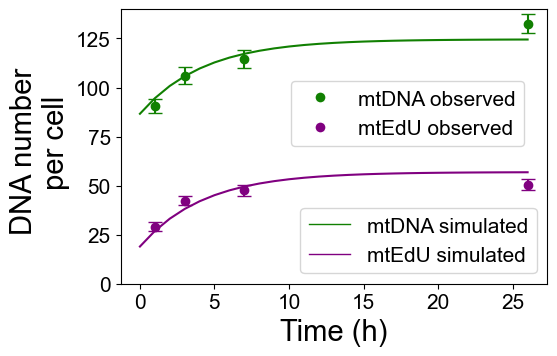

In [24]:
plt.figure(figsize = (6,4))
z = theoretical_edu_incorporation_LPS(np.arange(27), popt_LPS[0], popt_LPS[1],popt_LPS[2],popt_LPS[3])
plt.plot(np.arange(27), z[:27], color = "#118002", label = "mtDNA simulated")
plt.plot(np.arange(27), z[27:], color = '#800080', label = "mtEdU simulated")
times = np.array([1,3,7,26])
plt.errorbar(times, mean_dna_LPS, err_dna_LPS, fmt = "o", capsize=5, color = "#118002", label = "mtDNA observed")
plt.errorbar(times, mean_edu_LPS, err_edu_LPS, fmt = "o", capsize=5, color = '#800080', label = "mtEdU observed")
plt.xlabel("Time (h)")
plt.ylabel("DNA number \n per cell")
#plt.legend(ncols = 1)

legend_elements = [Line2D([0], [0], color="#118002", lw=1, label='mtDNA simulated'),
                Line2D([0], [0], color='#800080', lw=1, label='mtEdU simulated')]

legend2_elements = [Line2D([0], [0], marker='o', color='w', label='mtDNA observed',markerfacecolor="#118002", markersize=8),
                    Line2D([0], [0], marker='o', color='w', label='mtEdU observed',markerfacecolor='#800080', markersize=8)]

legend1 = plt.legend(handles=  legend_elements, ncol=1)
plt.legend(handles = legend2_elements, loc = (0.4,0.5))
plt.gca().add_artist(legend1)
plt.tight_layout()
plt.ylim(0,140)

Computing and plotting the replication rate and its error over time for the LPS cells (Supplementary Information Section 5.1.2)

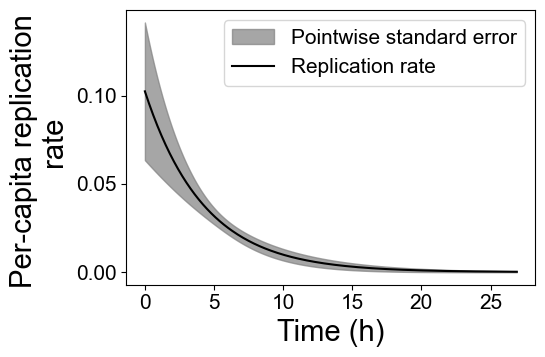

In [25]:
def birth_rate_jacobian(f_o, mu_r, p,t):
    e = np.exp(-p*mu_r*t)
    df = mu_r*e
    dmu = e*f_o*(1-mu_r*p*t)
    dp = -e*f_o*mu_r**2*t
    return np.array([df, dmu, dp])

errors = []
times = np.arange(27, step=0.1)
for time in times:
    J = birth_rate_jacobian(popt_LPS[0], popt_LPS[1],popt_LPS[2], time)
    errors.append(np.sqrt(np.dot(np.dot(J.transpose(),pcov_LPS[:3,:3]), J)))
errors=np.array(errors)

plt.figure(figsize = (6,4))
plt.fill_between(times, popt_LPS[0]*popt_LPS[1]*np.exp(-popt_LPS[2]*popt_LPS[1]*times) - errors,popt_LPS[0]*popt_LPS[1]*np.exp(-popt_LPS[2]*popt_LPS[1]*times) + errors, color="grey", alpha = 0.7, label = "Pointwise standard error")
plt.plot(times,popt_LPS[0]*popt_LPS[1]*np.exp(-popt_LPS[2]*popt_LPS[1]*times), color = "black", label = "Replication rate")
plt.xlabel("Time (h)")
plt.ylabel("Per-capita replication \n rate")
plt.legend()
plt.tight_layout()